# 2019 Bloomington, IN Weather Data
_Weather Data Provided by Visual Crossing_


## About the Data

This data came from free version of the weather service, [Visual Crossing](https://www.visualcrossing.com/).

## Attribution Required
Attribution for all Visual Crossing Weather Data usage is required at the Free licensing level. Any application or service which incorporates data obtained from the Visual Crossing Weather Data Server must prominently display the message **"Weather Data Provided by Visual Crossing"** in a legible manner near the data or any information derived from Visual Crossing weather data. This message should include a clickable link to https://www.visualcrossing.com/weather-data.



In [0]:
# Import Libraries
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv("data/weather_2019_hourly.csv")
df.columns = df.columns.str.replace(" ","_").str.lower()

In [0]:
# Convert to datetime object
df.date_time = pd.to_datetime(df.date_time)

In [6]:
# Set the index and keep a date column for ease of use
df.date = df.date_time
df.set_index('date_time',inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [0]:
# create some helpful columns
df['year'] = df.index.year
df['month'] = df.index.month
df['weekday_name'] = df.index.weekday_name

# Add Academic Calendar Variables


*   Spring 2019 01/07/19 to 05/03/19
*   Summer 2019 05/07/19 to 07/26/19
*   Fall 2019 08/26/19 to 12/20/19

In [0]:
# Add an academic period variable
df['academic_period'] = 'off'
df['academic_period'] = np.where((df.date >= '2019-01-07') & (df.date <= '2019-05-03'),'Spring 2019',df.academic_period)
df['academic_period'] = np.where((df.date >= '2019-05-07') & (df.date <= '2019-07-26'),'Summer 2019',df.academic_period)
df['academic_period'] = np.where((df.date >= '2019-08-26') & (df.date <= '2019-12-20'),'Fall 2019',df.academic_period)

# Just exploring the data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).max()
  """Entry point for launching an IPython kernel.


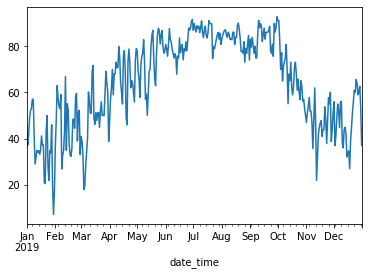

In [35]:
df.maximum_temperature.resample('D',how='max').plot.line()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).max()
  """Entry point for launching an IPython kernel.


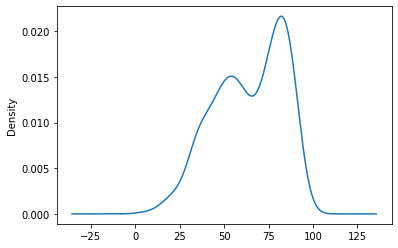

In [41]:
df.maximum_temperature.resample('D',how='max').plot.density()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


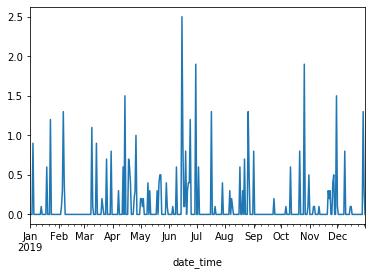

In [38]:
df.precipitation.resample('D',how='sum').plot.line()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


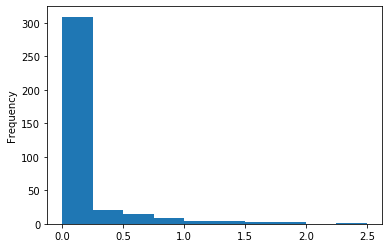

In [40]:
df.precipitation.resample('D',how='sum').plot.hist()

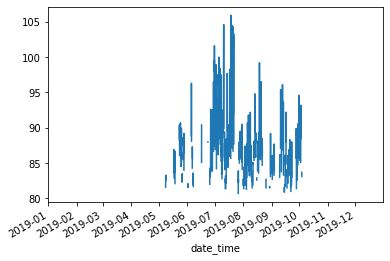

In [43]:
df.heat_index.plot.line()

In [0]:
# Setup our meter data so that we can join it to our hourly weather dataframe
meter = pd.read_csv('data/one_meter.txt',delimiter='\t')
meter.columns = meter.columns.str.replace(" ","_").str.lower()
meter.read_dtm = pd.to_datetime(meter.read_dtm)
meter.read_dt = pd.to_datetime(meter.read_dt)

In [0]:
# Add a new datetime column at the hour level
meter['read_dthr'] = pd.to_datetime(pd.DataFrame({'year':meter.read_dtm.dt.year,'month':meter.read_dtm.dt.month,'day':meter.read_dtm.dt.day,'hour':meter.read_dtm.dt.hour}))